# Size of random forest

Let's see how large a random forest becomes.

In [1]:
import numpy as np
import sklearn 
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import fetch_openml

What is the size of a random forest? We use here the sum of the node counts over all trees. Indeed, each internal node needs to store a decision criterion, as well as a point to its child nodes, while a leaf needs to store its associated class. Thus, the total node count is a good proxy for the size of the random forest.

We count the total node counts depending on different sizes of the training set in the method below.

In [2]:
def compute_node_counts(X,y,training_sizes):
    X=X.values  # turn into numpy array
    X, y = sklearn.utils.shuffle(X,y)
    node_counts=[]
    for train_size in training_sizes:
        X_train,X_test=X[:train_size],X[train_size:]
        y_train,y_test=y[:train_size],y[train_size:]    
        rf=RandomForestClassifier(n_estimators=100)
        rf.fit(X_train,y_train)
        node_counts.append(sum([tree.tree_.node_count for tree in rf.estimators_]))
    return node_counts

Next, we need a bit of code to plot the total node counts. We also do a linear fit for the node counts.

In [3]:
from sklearn.linear_model import LinearRegression

def fitline(training_sizes,node_counts):
    lr=LinearRegression()
    lr.fit(np.array(training_sizes).reshape(-1,1),node_counts)
    return lr.coef_[0],lr.intercept_

def draw_fitline(ax,training_sizes,node_counts):
    a,b=fitline(training_sizes,node_counts)
    tr=np.array(training_sizes)
    ax.plot(tr,a*tr+b,'tab:gray',linewidth=3,zorder=2)
    ax.annotate("fitted growth: {:.1f}".format(a),(0.65,0.2),xycoords='figure fraction')

def compute_and_plot_node_counts(X,y,training_sizes,title="",draw_fit=False):
    node_counts=compute_node_counts(X,y,training_sizes)
    fig,ax=plt.subplots(figsize=(5,5))
    ax.plot(training_sizes,node_counts,'o',zorder=10)
    ax.set_ylim(bottom=0)
    ax.set_xlim(left=0)
    ax.set_xlabel("size of training set")
    ax.set_ylabel("total node count")    
    ax.set_title(title)
    if draw_fit:
        draw_fitline(ax,training_sizes,node_counts)
    return ax

We first take a dataset on satellite images.

/home/henning/miniconda3/envs/ml/lib/python3.10/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


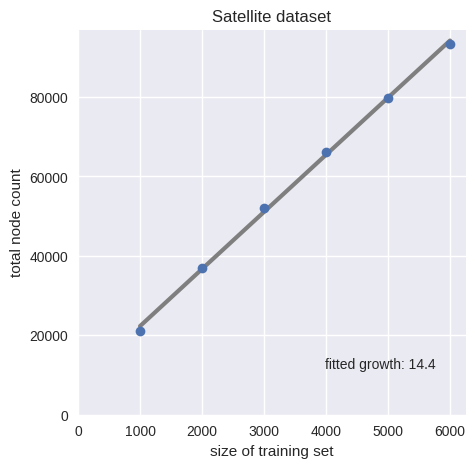

In [4]:
data = fetch_openml('satellite_image', cache=True)
X, y = data["data"], data["target"]
training_sizes=[1000,2000,3000,4000,5000,6000]
ax=compute_and_plot_node_counts(X,y,training_sizes,title="Satellite dataset",draw_fit=True)

Interestingly, we see linear growth in the size of the training set.

Let's see how this looks like for a different dataset. 

/home/henning/miniconda3/envs/ml/lib/python3.10/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


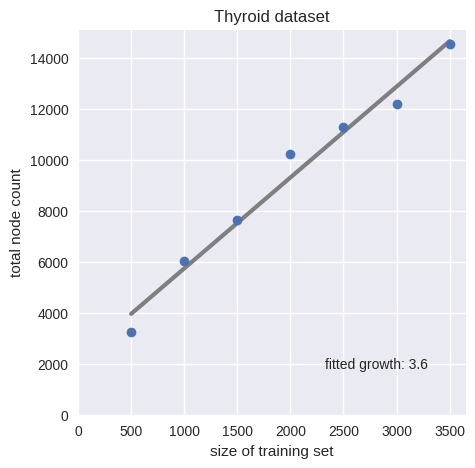

In [5]:
data = fetch_openml('thyroid-ann', cache=True)
X, y = data["data"], data["target"]
training_sizes=[500,1000,1500,2000,2500,3000,3500]
ax=compute_and_plot_node_counts(X,y,training_sizes,title="Thyroid dataset",draw_fit=True)

Again, we observe linear growth. The rate of increase, however, is quite a bit lower. So apparently, and not at all surprisingly, the size of the random forest depends on the data. Nevertheless, the linear growth does not bode well for large training sets: There we can expect a fairly large random forest. To counteract that we could limit the size of the individual trees -- which may, however, impact the overall accuracy of the classifier. 

Note: all experiments here are run just once. For a more reliable analysis, each experiment should be repeated a number of times. 